In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import MDAnalysis as mda
from MDAnalysis.analysis import pca, align
# import nglview as nv

import warnings
# suppress some MDAnalysis warnings about writing PDB files
warnings.filterwarnings('ignore')

In [2]:
u = mda.Universe("backbone.pdb", "backbone_cut_md_250_300.xtc")

In [3]:
aligner = align.AlignTraj(u, u, select='backbone',
                          in_memory=True).run()

In [4]:
pc = pca.PCA(u, select='backbone',
             align=True, mean=None,
             n_components=None).run()


In [5]:
backbone = u.select_atoms('backbone')
n_bb = len(backbone)
print('There are {} backbone atoms in the analysis'.format(n_bb))
print(pc.p_components.shape)

There are 786 backbone atoms in the analysis
(2358, 2358)


In [6]:
print(f"PC1: {pc.variance[0]:.5f}")

PC1: 198.61527


In [7]:
for i in range(3):
    print(f"Cumulated variance: {pc.cumulated_variance[i]:.3f}")

Cumulated variance: 0.241
Cumulated variance: 0.371
Cumulated variance: 0.432


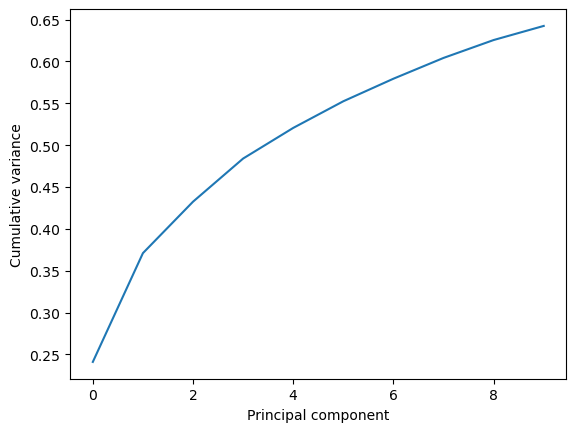

In [8]:
plt.plot(pc.cumulated_variance[:10])
plt.xlabel('Principal component')
plt.ylabel('Cumulative variance')
plt.show()

In [9]:
transformed = pc.transform(backbone, n_components=3)
transformed.shape

(23001, 3)

In [10]:
df = pd.DataFrame(transformed,
                  columns=['PC{}'.format(i+1) for i in range(3)])
df['Time (ps)'] = df.index * u.trajectory.dt
df.head()
df.to_csv('new_pca_apalu_mutant_876L.csv')

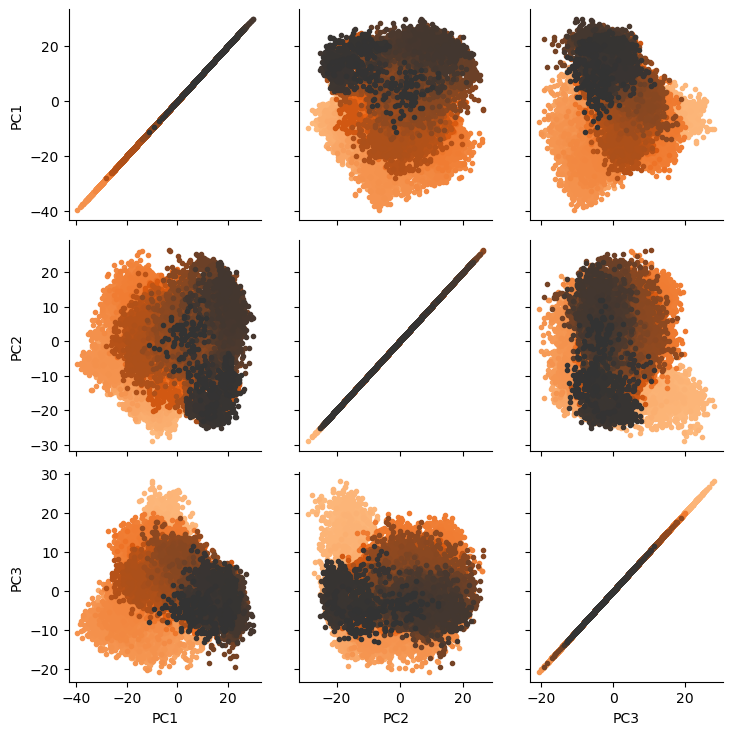

In [11]:
import seaborn as sns

g = sns.PairGrid(df, hue='Time (ps)',
                 palette=sns.color_palette('Oranges_d',
                                           n_colors=len(df)))
g.map(plt.scatter, marker='.')
plt.savefig('new_pca_apalu_mutant_876L.png',dpi=300)
plt.show()